In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
len(x_train)

60000

In [5]:
x_train[0].shape

(28, 28)

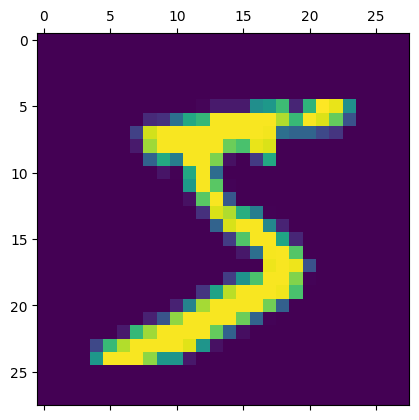

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
plt.show(x_train[0])

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train_fixed = x_train.reshape(len(x_train), 28*28)
x_test_fixed = x_test.reshape(len(x_test), 28*28)
x_train_fixed.shape
x_test_fixed.shape

(10000, 784)

In [18]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_fixed, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - accuracy: 0.8088 - loss: 0.7271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.9134 - loss: 0.3146
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.9224 - loss: 0.2800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.9229 - loss: 0.2725
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.9273 - loss: 0.2633


In [19]:
model.evaluate(x_test_fixed, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9159 - loss: 0.3020


[0.26688119769096375, 0.9257000088691711]

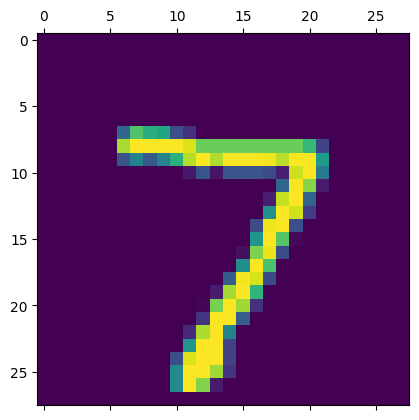

In [27]:
plt.matshow(x_test[0])
plt.show()

In [29]:
y_predicted = model.predict(x_test_fixed)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


array([1.6957665e-02, 3.0413594e-07, 6.7511588e-02, 9.4406515e-01,
       1.9231654e-03, 1.0697993e-01, 1.8532508e-06, 9.9980199e-01,
       9.6189067e-02, 6.6917098e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

7

In [31]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1113,    2,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  919,   16,    7,    5,   13,   10,   42,    5],
       [   2,    0,   18,  916,    0,   24,    2,   12,   27,    9],
       [   2,    1,    4,    1,  906,    0,   10,    4,    7,   47],
       [   8,    2,    3,   33,    6,  775,   12,    7,   38,    8],
       [  15,    3,    7,    1,    7,   14,  906,    2,    3,    0],
       [   1,    5,   22,    4,    6,    0,    0,  951,    3,   36],
       [   8,    7,    5,   17,    9,   22,    8,   13,  875,   10],
       [  11,    7,    1,    7,   16,    6,    0,   23,    5,  933]],
      dtype=int32)>

In [36]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_fixed, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.8692 - loss: 0.4651
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.9593 - loss: 0.1433
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9728 - loss: 0.0914
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.9804 - loss: 0.0676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9848 - loss: 0.0504
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.9869 - loss: 0.0432
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9898 - loss: 0.0352
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.9915 - loss: 0.0281
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.9935 - loss: 0.0222
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9946 - loss: 0.0192


In [37]:
model.evaluate(x_test_fixed, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9761 - loss: 0.0919


[0.07743360847234726, 0.9787999987602234]